#                                                                Loan Prediction

## 1.Problem

A Company Wants to automate the loan eligibility process based on customer details provided while filling online application form.These details are:

1.Gender

2.Marital Status

3.Education

4.Number of dependents

5.Income

6.Loan Amount

7.Credit History

8.Self_Employed

9.Appilcant Income

10.Coapplicant Income

## 2.Data

## 2.1 Understand the Data

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv("loan_approval_dataset.csv",low_memory=False)
df.head(10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   
5      13500000          10           319                    6800000   
6      33000000           4           678                   22500000   
7      15000000          20           382                   13200000   
8       2200000          20           782                    1300000   
9       4300000          10           388                    3200000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   
5                   8300000              13700000            5100000   
6                  14800000              29200000            4300000   
7                   5700000              11800000            6000000   
8                    800000               2800000             600000   
9                   1400000               3300000            1600000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected  
5     Rejected  
6     Approved  
7     Rejected  
8     Approved  
9     Rejected

### 2.1.2 Inspect the Dataset:

In [27]:
df.shape

(4269, 13)

In [28]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [29]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [30]:
df = df.drop(['loan_id'],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


# 2.2 Data Cleaning

### 2.2.1 Handling Null Values

In [32]:
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

### 2.2.2 Duplicates

In [33]:
df.duplicated().sum()

0

### 2.2.3 Categorical Data

In [34]:
df.columns = [col.strip() for col in df.columns]

In [35]:
df = df.rename(columns={'education': 'education_Graduate'})

In [36]:
df['education_Graduate'] = df['education_Graduate'].replace({' Graduate': 1, ' Not Graduate': 0})
df['loan_status'] = df['loan_status'].replace({' Approved': 1, ' Rejected': 0})
df['self_employed'] = df['self_employed'].replace({' Yes': 1, ' No': 0})

In [37]:
df.dtypes

no_of_dependents            int64
education_Graduate          int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

## 2.3 Univariate Analysis

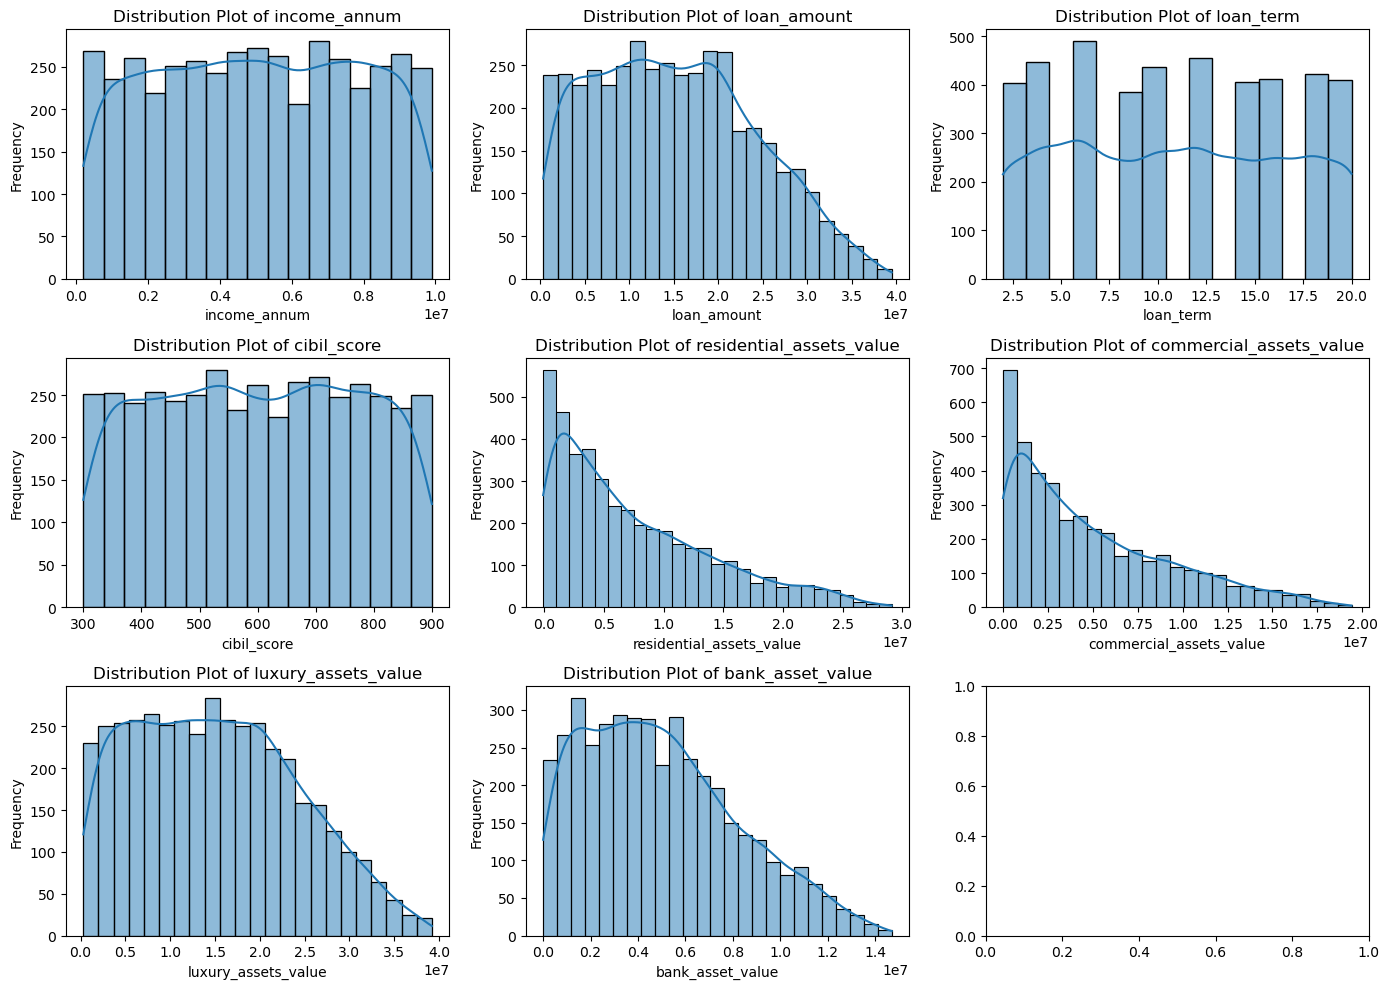

In [38]:
import warnings
warnings.filterwarnings("ignore")
columns = ['income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value',
           'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

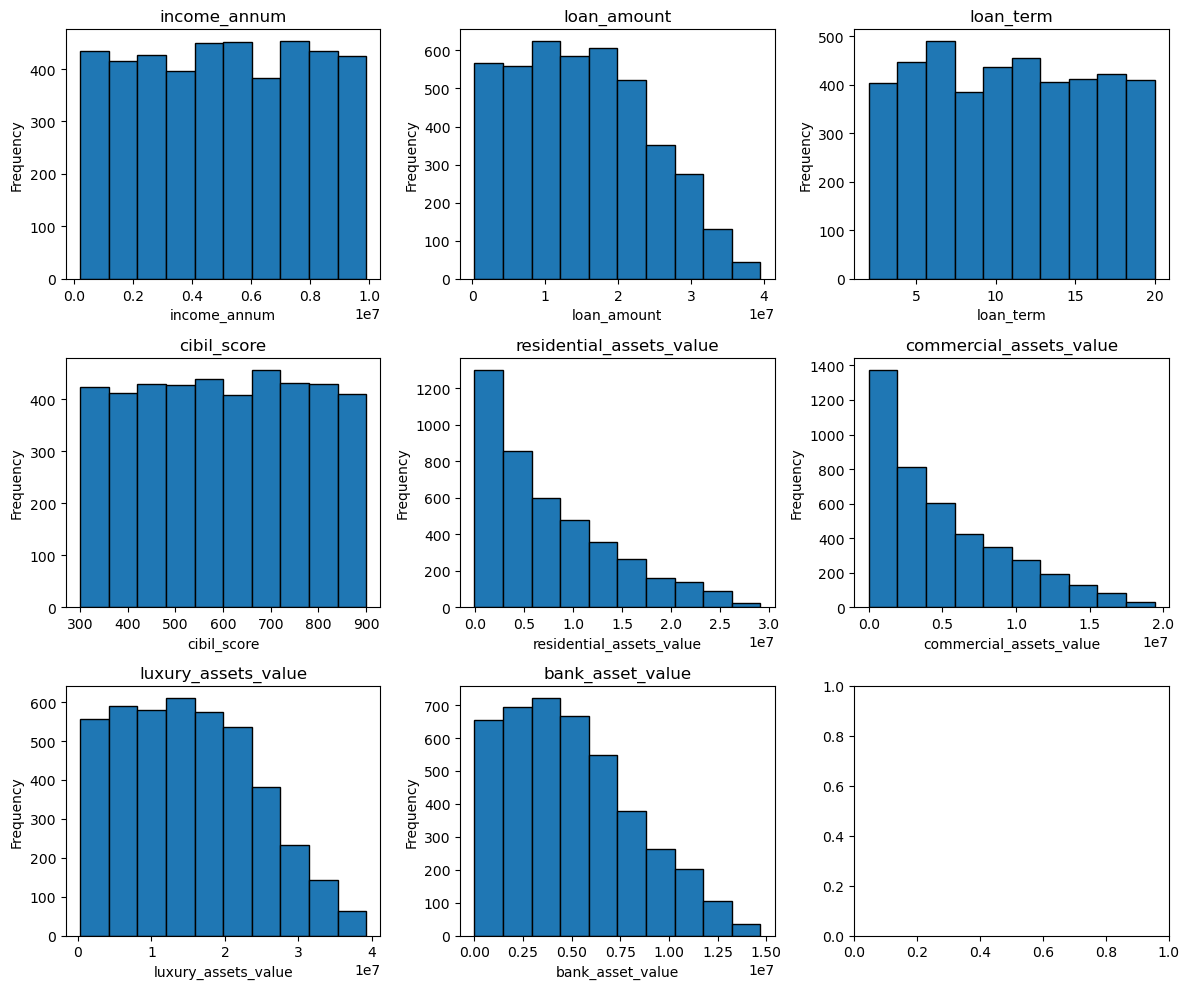

In [39]:
#columns = df.columns
columns = [ 'income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value', 
           'commercial_assets_value','luxury_assets_value', 'bank_asset_value']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
axes = axes.flatten()
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

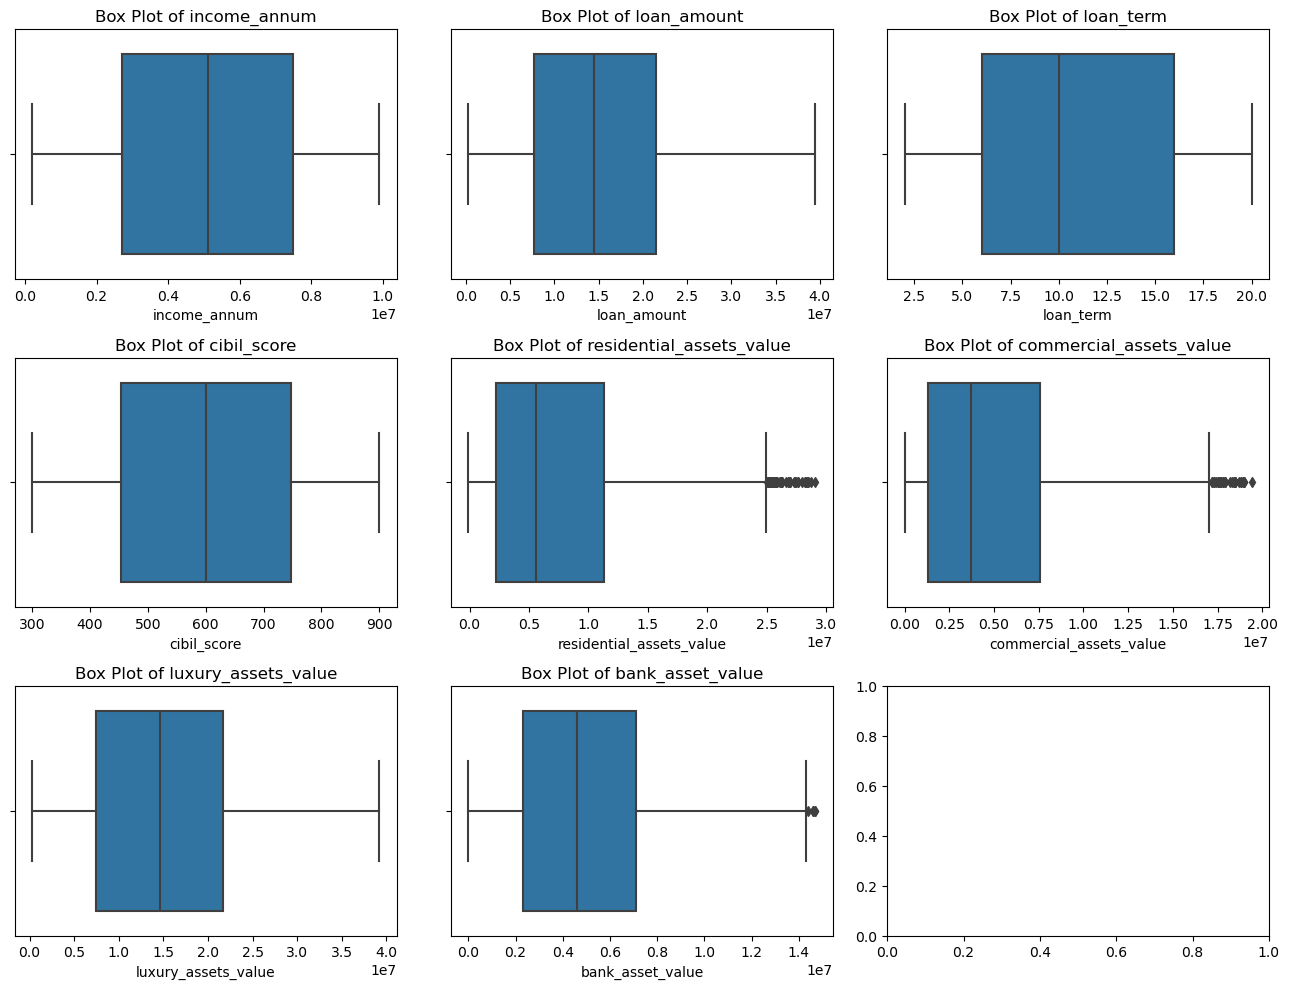

In [40]:
columns = ['income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value', 'commercial_assets_value',
           'luxury_assets_value', 'bank_asset_value']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,10))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

In [41]:
columns = ['income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value', 'commercial_assets_value',
           'luxury_assets_value', 'bank_asset_value']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

### Skewness

In [42]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].skew()

no_of_dependents           -0.017971
education_Graduate         -0.008905
self_employed              -0.014529
income_annum               -0.012814
loan_amount                 0.308724
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value    0.978451
commercial_assets_value     0.957791
luxury_assets_value         0.322208
bank_asset_value            0.560725
loan_status                -0.504087
dtype: float64

### Kurtosis

In [43]:
df[numeric_cols].kurt()

no_of_dependents           -1.256992
education_Graduate         -2.000858
self_employed              -2.000726
income_annum               -1.182729
loan_amount                -0.743680
loan_term                  -1.220853
cibil_score                -1.185670
residential_assets_value    0.184738
commercial_assets_value     0.100813
luxury_assets_value        -0.738056
bank_asset_value           -0.397277
loan_status                -1.746715
dtype: float64

### Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

# Fit and transform the data
df[['no_of_dependents', 'loan_term','cibil_score']] = min_max_scaler.fit_transform(df[['no_of_dependents', 'loan_term','cibil_score']]) #for skewness value '>=1'
df[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']] = std_scaler.fit_transform(df[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']])  #skewness value near to '0'

In [45]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].skew()

no_of_dependents           -0.017971
education_Graduate         -0.008905
self_employed              -0.014529
income_annum               -0.012814
loan_amount                 0.308724
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value    0.978451
commercial_assets_value     0.957791
luxury_assets_value         0.322208
bank_asset_value            0.560725
loan_status                -0.504087
dtype: float64

### Transformation

In [22]:
df[['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']] = np.log(df[['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']])


In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].skew()

no_of_dependents           -0.017971
education_Graduate         -0.008905
self_employed              -0.014529
income_annum               -1.691709
loan_amount                -1.419181
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value   -1.317089
commercial_assets_value    -1.480619
luxury_assets_value        -1.393335
bank_asset_value           -1.366579
loan_status                -0.504087
dtype: float64

In [46]:
df[['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']] = np.sqrt(df[['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']])


In [47]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].skew()

no_of_dependents           -0.017971
education_Graduate         -0.008905
self_employed              -0.014529
income_annum               -0.573474
loan_amount                -0.060872
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value    0.050589
commercial_assets_value    -0.045539
luxury_assets_value        -0.068526
bank_asset_value            0.031090
loan_status                -0.504087
dtype: float64

## Bivariate Analysis

### Covariance

In [48]:
cov_matrix=df[numeric_cols].cov()
df[numeric_cols].cov()

no_of_dependents  education_Graduate  self_employed  \
no_of_dependents                  0.115044            0.000457       0.000130   
education_Graduate                0.000457            0.250054      -0.005807   
self_employed                     0.000130           -0.005807       0.250045   
income_annum                     -0.001523            0.000785       0.002990   
loan_amount                      -0.000487           -0.001928       0.002128   
loan_term                        -0.002164           -0.001335       0.000651   
cibil_score                      -0.000975           -0.000668      -0.000699   
residential_assets_value         -0.006580            0.004730       0.001667   
commercial_assets_value          -0.002920           -0.005252       0.000081   
luxury_assets_value              -0.002794           -0.001431       0.007470   
bank_asset_value                 -0.000422           -0.002298      -0.004477   
loan_status                      -0.002979            0.001192       0.000084   

                          income_annum  loan_amount  loan_term  cibil_score  \
no_of_dependents             -0.001523    -0.000487  -0.002164    -0.000975   
education_Graduate            0.000785    -0.001928  -0.001335    -0.000668   
self_employed                 0.002990     0.002128   0.000651    -0.000699   
income_annum                  0.098795     0.053514   0.000803     0.001597   
loan_amount                   0.053514     0.120202  -0.000036     0.003252   
loan_term                     0.000803    -0.000036   0.100601     0.000712   
cibil_score                   0.001597     0.003252   0.000712     0.082590   
residential_assets_value      0.044358     0.033986   0.005022     0.003435   
commercial_assets_value       0.045704     0.042464  -0.004142     0.001672   
luxury_assets_value           0.056138     0.039592   0.002675    -0.001769   
bank_asset_value              0.043596     0.029014   0.002862     0.000992   
loan_status                   0.002387     0.011880  -0.017385     0.107375   

                          residential_assets_value  commercial_assets_value  \
no_of_dependents                         -0.006580                -0.002920   
education_Graduate                        0.004730                -0.005252   
self_employed                             0.001667                 0.000081   
income_annum                              0.044358                 0.045704   
loan_amount                               0.033986                 0.042464   
loan_term                                 0.005022                -0.004142   
cibil_score                               0.003435                 0.001672   
residential_assets_value                  0.163683                 0.041117   
commercial_assets_value                   0.041117                 0.167758   
luxury_assets_value                       0.035188                 0.036893   
bank_asset_value                          0.031635                 0.037950   
loan_status                               0.001169                 0.006873   

                          luxury_assets_value  bank_asset_value  loan_status  
no_of_dependents                    -0.002794         -0.000422    -0.002979  
education_Graduate                  -0.001431         -0.002298     0.001192  
self_employed                        0.007470         -0.004477     0.000084  
income_annum                         0.056138          0.043596     0.002387  
loan_amount                          0.039592          0.029014     0.011880  
loan_term                            0.002675          0.002862    -0.017385  
cibil_score                         -0.001769          0.000992     0.107375  
residential_assets_value             0.035188          0.031635     0.001169  
commercial_assets_value              0.036893          0.037950     0.006873  
luxury_assets_value                  0.121733          0.032960     0.001170  
bank_asset_value                     0.032960  

### Correlation

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [52]:
corr_matrix=df[numeric_cols].corr()
df[numeric_cols].corr()

no_of_dependents  education_Graduate  self_employed  \
no_of_dependents                  1.000000            0.002697       0.000765   
education_Graduate                0.002697            1.000000      -0.023224   
self_employed                     0.000765           -0.023224       1.000000   
income_annum                     -0.014324            0.004993       0.019020   
loan_amount                      -0.004162           -0.011121       0.012274   
loan_term                        -0.020111           -0.008417       0.004107   
cibil_score                      -0.009998           -0.004649      -0.004866   
residential_assets_value         -0.048461            0.023378       0.008238   
commercial_assets_value          -0.021139           -0.025636       0.000397   
luxury_assets_value              -0.023665           -0.008202       0.042812   
bank_asset_value                 -0.003271           -0.012045      -0.023456   
loan_status                      -0.018114            0.004918       0.000345   

                          income_annum  loan_amount  loan_term  cibil_score  \
no_of_dependents             -0.014324    -0.004162  -0.020111    -0.009998   
education_Graduate            0.004993    -0.011121  -0.008417    -0.004649   
self_employed                 0.019020     0.012274   0.004107    -0.004866   
income_annum                  1.000000     0.570524   0.008094     0.017878   
loan_amount                   0.570524     1.000000  -0.000330     0.033077   
loan_term                     0.008094    -0.000330   1.000000     0.007810   
cibil_score                   0.017878     0.033077   0.007810     1.000000   
residential_assets_value      0.378117     0.251874   0.039395     0.029547   
commercial_assets_value       0.383693     0.304392  -0.032077     0.014201   
luxury_assets_value           0.586123     0.351643   0.024279    -0.017890   
bank_asset_value              0.397102     0.230936   0.023732     0.009110   
loan_status                   0.015621     0.070812  -0.113036     0.770518   

                          residential_assets_value  commercial_assets_value  \
no_of_dependents                         -0.048461                -0.021139   
education_Graduate                        0.023378                -0.025636   
self_employed                             0.008238                 0.000397   
income_annum                              0.378117                 0.383693   
loan_amount                               0.251874                 0.304392   
loan_term                                 0.039395                -0.032077   
cibil_score                               0.029547                 0.014201   
residential_assets_value                  1.000000                 0.252479   
commercial_assets_value                   0.252479                 1.000000   
luxury_assets_value                       0.260540                 0.267431   
bank_asset_value                          0.211244                 0.247712   
loan_status                               0.005930                 0.034583   

                          luxury_assets_value  bank_asset_value  loan_status  
no_of_dependents                    -0.023665         -0.003271    -0.018114  
education_Graduate                  -0.008202         -0.012045     0.004918  
self_employed                        0.042812         -0.023456     0.000345  
income_annum                         0.586123          0.397102     0.015621  
loan_amount                          0.351643          0.230936     0.070812  
loan_term                            0.024279          0.023732    -0.113036  
cibil_score                         -0.017890          0.009110     0.770518  
residential_assets_value             0.260540          0.211244     0.005930  
commercial_assets_value              0.267431          0.247712     0.034583  
luxury_assets_value                  1.000000          0.257309     0.006891  
bank_asset_value                     0.257309  

In [54]:
plt.figure(figsize=(10, 10))
sns.pairplot(df)
plt.show()

<Figure size 1000x1000 with 0 Axes>

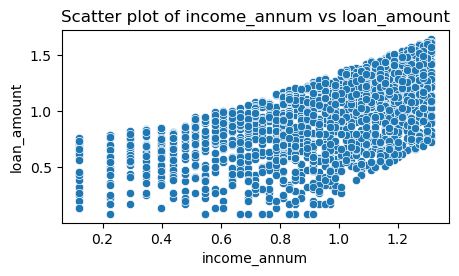

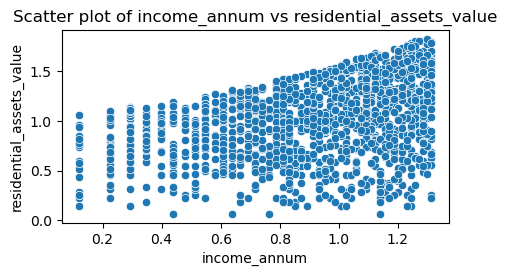

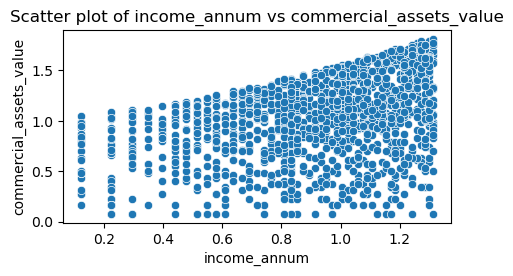

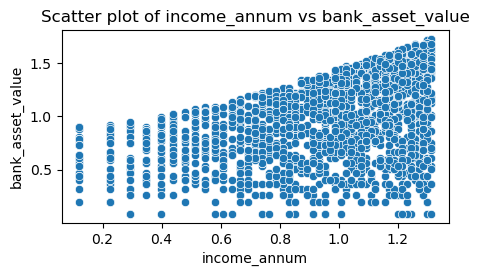

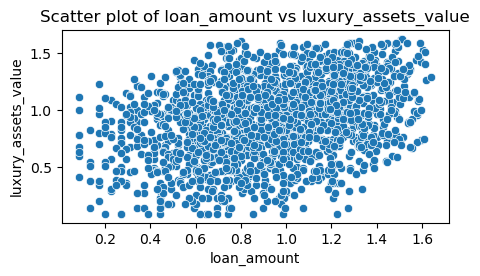

In [55]:
corr_matrix = df.corr()

pairs = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i+1, corr_matrix.shape[0]) if abs(corr_matrix.iloc[i, j]) > 0.3]

for pair in pairs:
    plt.figure(figsize=(5, 2.5))
    sns.scatterplot(data=df, x=df.columns[pair[0]], y=df.columns[pair[1]])
    plt.title(f'Scatter plot of {df.columns[pair[0]]} vs {df.columns[pair[1]]}')
    plt.show()

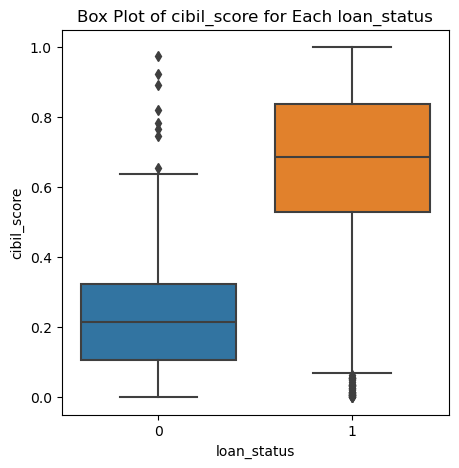

In [56]:
plt.figure(figsize=(5,5))
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('Box Plot of cibil_score for Each loan_status')
plt.xlabel('loan_status')
plt.ylabel('cibil_score')

plt.show()